In [75]:
import pandas as pd
import numpy as np

In [76]:
df=pd.read_csv("LoanDataN.csv")

In [77]:
df.dtypes

LOAN_NUMBER                       int64
SAMPLE_DATE                      object
FILE_REQ_DATE                    object
SECOND_REQUEST_DATE              object
SENT_TO_IMAGING_DATE             object
LENDER_RESPONSE_DUE_DATE         object
DATE_LOAN_FINALIZED              object
LENDER_ID                        object
LENDER_NAME                      object
LENDER_LOAN_ID                   object
PROP_STATE                       object
NEW_CONSTRUCTION_INDICATOR       object
CONDOMINIUM_INDICATOR            object
LOAN_ORIG_DATE                   object
 CURRENT_BALANCE                 object
FICO_SCORE                        int64
LTV                             float64
 ORIG_VALUE                      object
 AVM_VALUE                       object
FIELD_REVIEW_VALUE_SUPPORTED     object
FIELD_REVIEW_VALUE              float64
PURPOSE_CODE                     object
OCCUPANCY_CODE                   object
LENDER_INST_TYPE_DESCRIPTION     object
UNDERWRITER_NAME                 object


In [78]:
df.columns = df.columns.str.replace(' ','')

In [79]:
df.describe()

,LOAN_NUMBER,FICO_SCORE,LTV,FIELD_REVIEW_VALUE,REVIEW_STATUS
count,2.000000e+03,2000.000000,2000.00000,15.000000,1830.000000
mean,2.466259e+07,760.999500,90.57864,188633.333333,4.013115
std,7.640715e+06,39.762747,4.06107,110050.388892,0.332070
min,2.076077e+06,111.000000,80.43000,77000.000000,1.000000
25%,1.955924e+07,738.750000,88.10750,100000.000000,4.000000
50%,2.449322e+07,769.000000,90.00000,172000.000000,4.000000
75%,2.939616e+07,791.000000,95.00000,234500.000000,4.000000
max,2.495678e+08,823.000000,97.00000,470000.000000,6.000000


In [80]:
df['CURRENT_BALANCE']=df['CURRENT_BALANCE'].str.replace('$','')
df['CURRENT_BALANCE']=df['CURRENT_BALANCE'].str.replace(',','')

C:\Users\DELL\AppData\Local\Temp\ipykernel_26036\3580086150.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['CURRENT_BALANCE']=df['CURRENT_BALANCE'].str.replace('$','')


In [81]:
df['CURRENT_BALANCE']

0        247050.00 
1        119000.00 
2        315000.00 
3        303050.00 
4        120000.00 
           ...     
1995     142000.00 
1996     200000.00 
1997     245000.00 
1998     112590.00 
1999     182700.00 
Name: CURRENT_BALANCE, Length: 2000, dtype: object

In [82]:
df['CURRENT_BALANCE']=df['CURRENT_BALANCE'].astype(float)

In [83]:
df['CURRENT_BALANCE'].describe

<bound method NDFrame.describe of 0       247050.0
1       119000.0
2       315000.0
3       303050.0
4       120000.0
          ...   
1995    142000.0
1996    200000.0
1997    245000.0
1998    112590.0
1999    182700.0
Name: CURRENT_BALANCE, Length: 2000, dtype: float64>

In [84]:
df.value_counts(subset=['LENDER_INST_TYPE_DESCRIPTION'])

LENDER_INST_TYPE_DESCRIPTION          
Mortgage Banker - Bank Owned              661
Community Banks                           499
Credit Unions                             374
Mortgage Banker - (Large)                 279
Bank Owned Mortgage Company - National    187
dtype: int64

In [85]:
grp = df.groupby(['LENDER_INST_TYPE_DESCRIPTION']) 

In [86]:
print(grp)

In [87]:
grp.max('CURRENT_BALANCE') 

,LOAN_NUMBER,CURRENT_BALANCE,FICO_SCORE,LTV,FIELD_REVIEW_VALUE,REVIEW_STATUS
LENDER_INST_TYPE_DESCRIPTION,,,,,,
Bank Owned Mortgage Company - National,34433898,720000.0,817,97.0,NaN,5.0
Community Banks,34450098,729750.0,823,97.0,180000.0,6.0
Credit Unions,34432587,578250.0,819,97.0,332000.0,5.0
Mortgage Banker - (Large),249567785,729750.0,816,97.0,234000.0,5.0
Mortgage Banker - Bank Owned,34425735,625500.0,823,97.0,470000.0,5.0


In [88]:
df.groupby(['LENDER_INST_TYPE_DESCRIPTION']).mean()

,LOAN_NUMBER,CURRENT_BALANCE,FICO_SCORE,LTV,FIELD_REVIEW_VALUE,REVIEW_STATUS
LENDER_INST_TYPE_DESCRIPTION,,,,,,
Bank Owned Mortgage Company - National,2.398676e+07,242899.802139,752.310160,90.217219,NaN,4.082873
Community Banks,2.483355e+07,211839.963928,763.048096,90.143126,118000.000000,4.021413
Credit Unions,2.473157e+07,175149.601604,764.553476,90.807834,230666.666667,4.033149
Mortgage Banker - (Large),2.563226e+07,260374.383513,761.946237,90.971470,152875.000000,4.038462
Mortgage Banker - Bank Owned,2.427640e+07,236262.689864,759.500756,90.714175,234400.000000,3.958929


In [89]:
df.groupby(['LENDER_INST_TYPE_DESCRIPTION']).min('CURRENT_BALANCE')

,LOAN_NUMBER,CURRENT_BALANCE,FICO_SCORE,LTV,FIELD_REVIEW_VALUE,REVIEW_STATUS
LENDER_INST_TYPE_DESCRIPTION,,,,,,
Bank Owned Mortgage Company - National,14883402,43225.0,111,80.750000,NaN,1.0
Community Banks,2076077,28500.0,645,80.459999,79000.0,1.0
Credit Unions,2627790,22500.0,638,80.769997,77000.0,1.0
Mortgage Banker - (Large),3434642,59000.0,638,81.500000,78000.0,4.0
Mortgage Banker - Bank Owned,14973843,25018.0,629,80.430000,105000.0,1.0


In [90]:
# create a list of our conditions
conditions = [
    (df['LTV'] <= 85),
    (df['LTV'] > 85) & (df['LTV'] <= 90),
    (df['LTV'] > 90) & (df['LTV'] <= 95),
    (df['LTV'] > 95)
    ]

# create a list of the values we want to assign for each condition
values = ['<= 85%', '>85% and <= 90%', '>90% and <= 95%', '> 95%']

# create a new column and use np.select to assign values to it using our lists as arguments
df['LTV_Cohort'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,LOAN_NUMBER,SAMPLE_DATE,FILE_REQ_DATE,SECOND_REQUEST_DATE,SENT_TO_IMAGING_DATE,LENDER_RESPONSE_DUE_DATE,DATE_LOAN_FINALIZED,LENDER_ID,LENDER_NAME,LENDER_LOAN_ID,...,FIELD_REVIEW_VALUE,PURPOSE_CODE,OCCUPANCY_CODE,LENDER_INST_TYPE_DESCRIPTION,UNDERWRITER_NAME,REVIEW_DATE,REVIEW_STATUS,DEAL_NAME,START_DATE,LTV_Cohort
0,19457569,22-11-2010,25-11-2010,NaN,NaN,NaN,24-01-2011,ZMFHQJ,"Wells Fargo Bank, N.A.",26291118,...,NaN,P,B,Bank Owned Mortgage Company - National,Mike Willams,13-01-2011,4.0,WFMBS 2006-5,01-06-2013,>85% and <= 90%
1,16864087,03-04-2012,05-04-2012,20-04-2012,NaN,NaN,24-04-2012,NXYFBZ,"Wells Fargo Bank, N.A.",381247287,...,NaN,R,B,Bank Owned Mortgage Company - National,Mike Willams,23-04-2012,4.0,WFMBS 2006-AR4,01-06-2013,<= 85%
2,17137579,27-06-2012,27-06-2012,NaN,13-07-2012,NaN,20-07-2012,CKZGQU,Cobalt Mortgage Inc,38200028,...,NaN,P,B,Mortgage Banker - Bank Owned,Mike Willams,20-07-2012,4.0,WFMBS 2006-AR4,01-06-2013,>85% and <= 90%
3,20382551,08-10-2012,11-10-2012,NaN,26-10-2012,NaN,10-12-2012,DMYYBZ,McLean Mortgage Corporation,416297794,...,NaN,P,B,Mortgage Banker - Bank Owned,Eric Miller,30-11-2012,4.0,WFMBS 2006-5,01-06-2013,>90% and <= 95%
4,23078618,04-10-2012,08-10-2012,NaN,22-10-2012,NaN,25-10-2012,WIXLJR,LoanCare Servicing Center Inc,6967335,...,NaN,X,B,Mortgage Banker - (Large),Mike Willams,23-10-2012,4.0,WFMBS 2006-5,01-06-2013,<= 85%


In [91]:
df.value_counts(subset=['LTV_Cohort'])

LTV_Cohort     
>85% and <= 90%    823
>90% and <= 95%    796
<= 85%             344
> 95%               37
dtype: int64

In [92]:
df.groupby(['LTV_Cohort']).mean('CURRENT_BALANCE')

,LOAN_NUMBER,CURRENT_BALANCE,FICO_SCORE,LTV,FIELD_REVIEW_VALUE,REVIEW_STATUS
LTV_Cohort,,,,,,
<= 85%,2.486282e+07,223985.912791,766.930233,84.011163,270000.000000,4.015823
> 95%,2.407206e+07,200910.189189,757.837838,96.914054,NaN,4.028571
>85% and <= 90%,2.473923e+07,235966.178615,761.577157,89.218311,164666.666667,4.017173
>90% and <= 95%,2.452426e+07,209504.335427,757.986181,94.528832,171916.666667,4.006925


In [93]:
df.groupby(['LTV_Cohort']).max('CURRENT_BALANCE')

,LOAN_NUMBER,CURRENT_BALANCE,FICO_SCORE,LTV,FIELD_REVIEW_VALUE,REVIEW_STATUS
LTV_Cohort,,,,,,
<= 85%,34371800,729750.0,817,85.0,470000.0,5.0
> 95%,32977249,371510.0,813,97.0,NaN,5.0
>85% and <= 90%,249567785,729750.0,823,90.0,332000.0,5.0
>90% and <= 95%,34450098,561700.0,817,95.0,283000.0,6.0


In [94]:
df.groupby(['LTV_Cohort']).min('CURRENT_BALANCE')

,LOAN_NUMBER,CURRENT_BALANCE,FICO_SCORE,LTV,FIELD_REVIEW_VALUE,REVIEW_STATUS
LTV_Cohort,,,,,,
<= 85%,14950032,43300.0,620,80.430000,105000.0,1.0
> 95%,14875742,65475.0,685,95.949997,NaN,4.0
>85% and <= 90%,2076077,22500.0,111,85.010002,77000.0,1.0
>90% and <= 95%,2627790,28500.0,636,90.080002,79000.0,1.0


In [95]:
df['d1']= '2013-06-01'
df['d1'] = pd.to_datetime(df['d1'])
df['d2'] = pd.to_datetime(df['LOAN_ORIG_DATE'])
df['Loan_Age'] = ((df.d1 - df.d2)/np.timedelta64(1, 'M'))

C:\Users\DELL\AppData\Local\Temp\ipykernel_26036\2770369880.py:3: UserWarning: Parsing '16-03-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['d2'] = pd.to_datetime(df['LOAN_ORIG_DATE'])


In [96]:
df['Loan_Age']=df['Loan_Age'].round(0)

In [97]:
# create a list of our conditions
conditions = [
    (df['Loan_Age'] >= 0) & (df['Loan_Age'] <= 9),
    (df['Loan_Age'] >=10) & (df['Loan_Age'] <= 19),
    (df['Loan_Age'] >=20) & (df['Loan_Age'] <= 29),
    (df['Loan_Age'] > 30) & (df['Loan_Age'] <= 39),
    (df['Loan_Age'] >= 40)
    ]

# create a list of the values we want to assign for each condition
values = ['0 - 9 Months', '10 - 19 Months', '20 - 29 Months', '30 - 39 Months','>= 40 Months']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Loan_Age_Cohort'] = np.select(conditions, values)


In [98]:

df['Loan_Age']


0       33.0
1       19.0
2       13.0
3       10.0
4       13.0
        ... 
1995    34.0
1996    11.0
1997    11.0
1998    23.0
1999    21.0
Name: Loan_Age, Length: 2000, dtype: float64

In [99]:
df['Loan_Age_Cohort']

0       30 - 39 Months
1       10 - 19 Months
2       10 - 19 Months
3       10 - 19 Months
4       10 - 19 Months
             ...      
1995    30 - 39 Months
1996    10 - 19 Months
1997    10 - 19 Months
1998    20 - 29 Months
1999    20 - 29 Months
Name: Loan_Age_Cohort, Length: 2000, dtype: object

In [100]:
df.value_counts(subset=['Loan_Age_Cohort'])

Loan_Age_Cohort
10 - 19 Months     745
20 - 29 Months     535
0 - 9 Months       279
30 - 39 Months     232
>= 40 Months       176
0                   33
dtype: int64

In [101]:
df.groupby(['Loan_Age_Cohort']).mean('CURRENT_BALANCE')

,LOAN_NUMBER,CURRENT_BALANCE,FICO_SCORE,LTV,FIELD_REVIEW_VALUE,REVIEW_STATUS,Loan_Age
Loan_Age_Cohort,,,,,,,
0,2.447424e+07,226758.787879,765.727273,91.090909,NaN,4.090909,30.000000
0 - 9 Months,2.450225e+07,234598.544803,760.494624,90.934875,470000.000000,3.836364,7.394265
10 - 19 Months,2.499438e+07,229151.401342,758.518121,90.612456,156250.000000,3.997097,14.401342
20 - 29 Months,2.448207e+07,212944.865421,762.076636,90.547551,161277.777778,4.056075,24.577570
30 - 39 Months,2.455218e+07,207214.219828,763.038793,90.538276,283000.000000,4.051724,35.241379
>= 40 Months,2.424191e+07,226121.687500,765.454545,89.922443,NaN,4.045455,44.323864


In [102]:
df.groupby(['Loan_Age_Cohort']).max('CURRENT_BALANCE')

,LOAN_NUMBER,CURRENT_BALANCE,FICO_SCORE,LTV,FIELD_REVIEW_VALUE,REVIEW_STATUS,Loan_Age
Loan_Age_Cohort,,,,,,,
0,34072928,416850.0,813,95.000000,NaN,5.0,30.0
0 - 9 Months,34341458,578250.0,818,97.000000,470000.0,5.0,9.0
10 - 19 Months,249567785,720000.0,820,97.000000,235000.0,5.0,19.0
20 - 29 Months,34426315,729750.0,823,97.000000,332000.0,6.0,29.0
30 - 39 Months,34327167,665100.0,819,95.000000,283000.0,5.0,39.0
>= 40 Months,34432587,729750.0,814,95.949997,NaN,5.0,67.0


In [103]:
df.groupby(['Loan_Age_Cohort']).min('CURRENT_BALANCE')

,LOAN_NUMBER,CURRENT_BALANCE,FICO_SCORE,LTV,FIELD_REVIEW_VALUE,REVIEW_STATUS,Loan_Age
Loan_Age_Cohort,,,,,,,
0,15147774,54760.0,681,84.820000,NaN,4.0,30.0
0 - 9 Months,14968147,43300.0,645,81.550003,470000.0,1.0,5.0
10 - 19 Months,14875742,25018.0,620,80.430000,95000.0,1.0,10.0
20 - 29 Months,14924510,22500.0,655,80.750000,77000.0,4.0,20.0
30 - 39 Months,14867621,41705.0,111,80.769997,283000.0,4.0,31.0
>= 40 Months,2076077,35000.0,664,81.000000,NaN,4.0,40.0


In [104]:
# create a list of our conditions
conditions = [
    (df['FICO_SCORE'] < 600),
    (df['FICO_SCORE'] >= 600) & (df['FICO_SCORE'] <= 699),
    (df['FICO_SCORE'] >= 700) & (df['FICO_SCORE'] <= 799),
    (df['FICO_SCORE'] >= 800)
    ]

# create a list of the values we want to assign for each condition
values = ['< 600', '600 - 699', '700 - 799', '>= 800']

# create a new column and use np.select to assign values to it using our lists as arguments
df['FICO_Cohort'] = np.select(conditions, values)



In [111]:
df1=df.groupby(['LTV_Cohort','FICO_Cohort'])['CURRENT_BALANCE'].aggregate('sum')

In [114]:
df1

LTV_Cohort       FICO_Cohort
<= 85%           600 - 699        3260490.0
                 700 - 799       60413630.0
                 >= 800          13377034.0
> 95%            600 - 699         629990.0
                 700 - 799        5359114.0
                 >= 800           1444573.0
>85% and <= 90%  600 - 699       14606019.0
                 700 - 799      149979009.0
                 < 600             247050.0
                 >= 800          29368087.0
>90% and <= 95%  600 - 699       14598016.0
                 700 - 799      135188314.0
                 >= 800          16979121.0
Name: CURRENT_BALANCE, dtype: float64

In [187]:
import matplotlib.pyplot as plt
import pandas as pd
   
data = {'LTV_Cohort': ['<=85%','<=85%','<=85%','> 95%','> 95%','> 95%', '>85% and <= 90%','>85% and <= 90%','>85% and <= 90%',
                   '>85% and <= 90%','>90% and<= 95%','>90% and<= 95%','>90% and<= 95%'],
        'FICO_Cohort' : ['600 - 699','700 - 799','>= 800','600 - 699','700 - 799','>= 800','600 - 699',
                       '700 - 799','< 600 ','>= 800 ','600 - 699','700 - 799','>= 800'],
        'Sum_Current_Balance': [3260490.0,60413630.0,13377034.0,629990.0,5359114.0,1444573.0,14606019.0,149979009.0
                            ,247050.0,29368087.0,14598016.0,135188314.0,16979121.0]
        
        }
df = pd.DataFrame(data)
df




,LTV_Cohort,FICO_Cohort,Sum_Current_Balance
0,<=85%,600 - 699,3260490.0
1,<=85%,700 - 799,60413630.0
2,<=85%,>= 800,13377034.0
3,> 95%,600 - 699,629990.0
4,> 95%,700 - 799,5359114.0
5,> 95%,>= 800,1444573.0
6,>85% and <= 90%,600 - 699,14606019.0
7,>85% and <= 90%,700 - 799,149979009.0
8,>85% and <= 90%,< 600,247050.0
9,>85% and <= 90%,>= 800,29368087.0


Text(0.5, 0.98, 'SUM of CURRENT_UPB by LTV Cohorts and FICO Cohorts ')

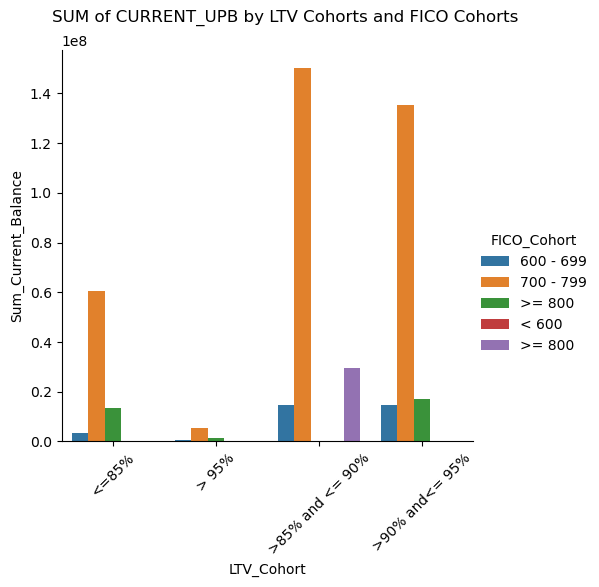

In [192]:
import seaborn as sns
chart = sns.catplot(data=df, x="LTV_Cohort", y="Sum_Current_Balance", hue="FICO_Cohort", kind="bar")
chart.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
plt.suptitle('SUM of CURRENT_UPB by LTV Cohorts and FICO Cohorts ', fontsize = 12)